<a href="https://colab.research.google.com/github/sholaypompey/project-sampling/blob/main/07_Food_Vision_Milestone_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import sklearn
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# Get helper functions file
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-11-11 15:23:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-11 15:23:48 (106 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback , walk_through_dir, unzip_data, plot_loss_curves,compare_historys

In [ ]:
# Check if the data we want to work on is in tensorflow datasets list
datasets_list = tfds.list_builders()
print("food101" in datasets_list)

True


In [ ]:
(train_data, test_data), ds_info = tfds.load(name = "food101",
                                             split = ["train", "validation"],
                                             shuffle_files = True,
                                             as_supervised= True,
                                             with_info = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/75750 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incompleteHR6O16/food101-train.tfrecord*...:   0%|          | 0/…

Generating validation examples...:   0%|          | 0/25250 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/food101/2.0.0.incompleteHR6O16/food101-validation.tfrecord*...:   0%|         …

Dataset food101 downloaded and prepared to ~/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [ ]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [ ]:
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

# Explore Food101 data from tensorflow datasets

In [ ]:
# Let's take one sample
train_one_sample = train_data.take(1)
train_one_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
for image, label in train_one_sample:
  print(f"""
  image_shape: {image.shape},
  image_dtype: {image.dtype},
  Target class from Food101 (tensor form): {label},
  class name (str form): {class_names[label.numpy()]}
""")


  image_shape: (512, 512, 3),
  image_dtype: <dtype: 'uint8'>,
  Target class from Food101 (tensor form): 18,
  class name (str form): chicken_curry



In [ ]:
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=5>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## Plot an image from tensorflow datasets

In [ ]:
def plot_image(image):
  image = plt.imshow(image)
  plt.title(class_names[label.numpy()])
  plt.axis("off")
  return image



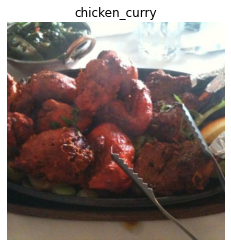

In [ ]:
plot_image(image)

## Preprocess our image for usage

In [ ]:
def preprocess_img(image, label, image_shape = 224):
  image = tf.image.resize(image, [image_shape, image_shape])
  return tf.cast(image, tf.float32), label # This will return (image, label) tuple  


In [ ]:
prep_image = preprocess_img(image, label)[0]

In [ ]:
# Preprocess a single sample image and check the outputs
print(f"Image before preprocessing: {image[:1]}.... \n {image.shape}.... \n {image.dtype}")
print(f"Image after preprocessing: {prep_image[:1]}... \n {prep_image.shape}.... \n {prep_image.dtype}")

Image before preprocessing: [[[170 193 165]
  [175 198 170]
  [187 209 186]
  ...
  [253 255 249]
  [253 255 249]
  [253 255 249]]].... 
 (512, 512, 3).... 
 <dtype: 'uint8'>
Image after preprocessing: [[[170.5051   188.59184  163.11736 ]
  [187.9898   206.82143  186.91837 ]
  [208.97958  225.69388  212.7653  ]
  [218.14285  235.14285  226.14285 ]
  [214.11224  233.46939  223.11224 ]
  [194.85204  216.92346  203.70917 ]
  [171.12753  194.12753  176.12753 ]
  [146.3265   168.04079  148.68365 ]
  [141.19897  156.39287  136.70409 ]
  [140.40306  150.03061  127.76021 ]
  [115.28566  125.28567   96.78566 ]
  [100.44898  116.80613   81.29592 ]
  [130.25513  158.34698  114.72962 ]
  [151.87244  188.81633  139.05612 ]
  [138.68877  178.22958  125.68877 ]
  [127.16325  167.11734  114.11733 ]
  [113.556114 156.14285  100.709175]
  [ 94.82143  136.67857   85.      ]
  [ 90.29081  129.5204    84.80102 ]
  [ 94.341835 129.25      96.510216]
  [115.2347   148.00511  121.69389 ]
  [168.0154   199.086

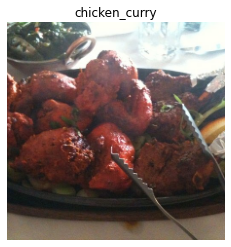

In [ ]:
plot_image(prep_image/255.)

# Batch and prepare image

In [ ]:
# Map preprocessing function to training data
train_data = train_data.map(map_func= preprocess_img, num_parallel_calls = tf.data.AUTOTUNE)
# batch train_data and prefecth it
train_data = train_data.shuffle(buffer_size = 1000).batch(batch_size = 32).prefetch(buffer_size = tf.data.AUTOTUNE)

test_data = test_data.map(map_func = preprocess_img, num_parallel_calls= tf.data.AUTOTUNE).batch(batch_size = 32).prefetch(buffer_size= tf.data.AUTOTUNE)

In [ ]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Create Modelling Callbacks

In [ ]:
checkpoint_path = "checkpointmodelcallbacks/cp.ckpt"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      monitor = "val_accuracy",
                                                      save_weights_only = True,
                                                      save_best_only = True,
                                                      verbose = 0)

## Set Mixed Precision Training

In [ ]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy("mixed_float16")

In [ ]:
mixed_precision.global_policy

<function keras.mixed_precision.policy.global_policy()>

# Build feature extraction model

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "input_layer")
x = base_model(inputs, training = False)
x = layers.Rescaling(1/255.)(x)
x = layers.GlobalAveragePooling2D(name= "global_average_pooling_layer")(x)
x = layers.Dense(len(class_names))(x)

outputs = layers.Activation("softmax", dtype= tf.float32, name= "output_layers")(x)
model = tf.keras.Model(inputs, outputs)

# Compile model
model.compile(loss= "sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["accuracy"])


94668760/94668760 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, None, None, 2048)  23564800  
                                                                 
 rescaling (Rescaling)       (None, 7, 7, 2048)        0         
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense (Dense)               (None, 101)               206949    
                                                                 
 output_layers (Activation)  (None, 101)               0         
                                                             

## Check layers dtype to confirm if we are using mixed precision

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
resnet50v2 False float32 <Policy "mixed_float16">
rescaling True float32 <Policy "mixed_float16">
global_average_pooling_layer True float32 <Policy "mixed_float16">
dense True float32 <Policy "mixed_float16">
output_layers True float32 <Policy "float32">


In [ ]:
for layer in model.layers[1].layers[:10]:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_1 False float32 <Policy "float32">
conv1_pad False float32 <Policy "mixed_float16">
conv1_conv False float32 <Policy "mixed_float16">
pool1_pad False float32 <Policy "mixed_float16">
pool1_pool False float32 <Policy "mixed_float16">
conv2_block1_preact_bn False float32 <Policy "mixed_float16">
conv2_block1_preact_relu False float32 <Policy "mixed_float16">
conv2_block1_1_conv False float32 <Policy "mixed_float16">
conv2_block1_1_bn False float32 <Policy "mixed_float16">
conv2_block1_1_relu False float32 <Policy "mixed_float16">


In [ ]:
history_101_food_classes_mixed_precision = model.fit(train_data,
                                    epochs = 3,
                                    steps_per_epoch = len(train_data),
                                    validation_data = test_data,
                                    validation_split = int(0.15 * len(test_data)),
                                    callbacks = [create_tensorboard_callback("training_logs", "Resnet_callback"), model_checkpoint])

Saving TensorBoard log files to: training_logs/Resnet_callback/20221111-153317
Epoch 1/3
2368/2368 [==============================] - 255s 102ms/step - loss: 4.3948 - accuracy: 0.0478 - val_loss: 4.2099 - val_accuracy: 0.0737
Epoch 2/3
2368/2368 [==============================] - 271s 114ms/step - loss: 4.2079 - accuracy: 0.0759 - val_loss: 4.1257 - val_accuracy: 0.0846
Epoch 3/3
2368/2368 [==============================] - 266s 111ms/step - loss: 4.1246 - accuracy: 0.0876 - val_loss: 4.0572 - val_accuracy: 0.0966


## Build another model

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetV2S(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape = input_shape, name = "input_layer")
x = base_model(inputs, training = False)
x = layers.GlobalAveragePooling2D(name= "global_average_pooling_layer")(x)
x = layers.Dense(len(class_names))(x)

outputs = layers.Activation("softmax", dtype= tf.float32, name= "output_layers")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile model
model_1.compile(loss= "sparse_categorical_crossentropy",
              optimizer= tf.keras.optimizers.Adam(),
              metrics= ["accuracy"])

82420632/82420632 [==============================] - 1s 0us/step


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-s (Functiona  (None, None, None, 1280)  20331360 
 l)                                                              
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 output_layers (Activation)  (None, 101)               0         
                                                                 
Total params: 20,460,741
Trainable params: 129,381
Non-trai

In [ ]:
history_101_food_classes_efficentnet_model = model_1.fit(train_data,
                                    epochs = 3,
                                    steps_per_epoch = len(train_data),
                                    validation_data = test_data,
                                    validation_split = int(0.15 * len(test_data)),
                                    callbacks = [create_tensorboard_callback("training_logs", "efficeintnet_model"), model_checkpoint])

Saving TensorBoard log files to: training_logs/efficeintnet_model/20221111-154636
Epoch 1/3
2368/2368 [==============================] - 297s 119ms/step - loss: 1.7700 - accuracy: 0.5618 - val_loss: 1.2095 - val_accuracy: 0.6762
Epoch 2/3
2368/2368 [==============================] - 326s 137ms/step - loss: 1.2873 - accuracy: 0.6668 - val_loss: 1.0932 - val_accuracy: 0.7070
Epoch 3/3
2368/2368 [==============================] - 266s 112ms/step - loss: 1.1568 - accuracy: 0.6970 - val_loss: 1.0486 - val_accuracy: 0.7154


In [ ]:
result_feature_extraction_model = model_1.evaluate(test_data)
result_feature_extraction_model

790/790 [==============================] - 73s 92ms/step - loss: 1.0486 - accuracy: 0.7154


[1.0486059188842773, 0.7153663635253906]

# Load and evaluate checkpoint weights

In [ ]:
clone_model = tf.keras.models.clone_model(model_1)
clone_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-s (Functiona  (None, None, None, 1280)  20331360 
 l)                                                              
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 dense_1 (Dense)             (None, 101)               129381    
                                                                 
 output_layers (Activation)  (None, 101)               0         
                                                                 
Total params: 20,460,741
Trainable params: 129,381
Non-trai

In [ ]:
clone_model.load_weights(checkpoint_path)

In [ ]:
# Recompile the model
clone_model.compile(loss= "sparse_categorical_crossentropy",
                    optimizer= tf.keras.optimizers.Adam(),
                    metrics = ["accuracy"])

In [ ]:
result_loaded_model_with_clone_weight = clone_model.evaluate(test_data)
result_loaded_model_with_clone_weight

790/790 [==============================] - 61s 71ms/step - loss: 1.0486 - accuracy: 0.7154


[1.0486055612564087, 0.7153663635253906]

In [ ]:
np.isclose(result_feature_extraction_model, result_loaded_model_with_clone_weight)

array([ True,  True])

## Save the model

In [ ]:
save_dir = "/content/drive/MyDrive/tensorflow/food101/Efficientnetv2/model"
model_1.save(save_dir)

In [ ]:
loaded_save_model = tf.keras.models.load_model(save_dir)

In [ ]:
for layer in loaded_save_model.layers:
  print(layer.name, layer.dtype, layer.dtype_policy)

input_layer float32 <Policy "float32">
efficientnetv2-s float32 <Policy "mixed_float16">
global_average_pooling_layer float32 <Policy "mixed_float16">
dense_1 float32 <Policy "mixed_float16">
output_layers float32 <Policy "float32">


## Evaluate our loaded saved model

In [ ]:
result_loaded_saved_model = loaded_save_model.evaluate(test_data)
result_loaded_saved_model

790/790 [==============================] - 62s 74ms/step - loss: 1.0486 - accuracy: 0.7154


[1.048606038093567, 0.7153663635253906]

In [ ]:
np.isclose(result_feature_extraction_model, result_loaded_saved_model)

array([ True,  True])

# Preparing our model for fine tunning

In [ ]:
for layer in loaded_save_model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

In [ ]:
for layer in loaded_save_model.layers:
  layer.trainable = True
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetv2-s True float32 <Policy "mixed_float16">
global_average_pooling_layer True float32 <Policy "mixed_float16">
dense_1 True float32 <Policy "mixed_float16">
output_layers True float32 <Policy "float32">


## A couple more callbacks

In [ ]:
 Earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                                   patience = 3)
 checkpoint_path_1 = "fine_tune_checkpoint/cp.ckpt/"
 checkpoint_finetune_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_1,
                                                                           monitor = "val_loss",
                                                                           save_best_only = True)
 reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                  factor = 0.2,
                                                  min_lr = 1e-7,
                                                  patience = 2,
                                                  verbose = 1)

In [ ]:
loaded_save_model.compile(loss = "sparse_categorical_crossentropy",
                          optimizer= tf.keras.optimizers.Adam(0.0001),
                          metrics= ["accuracy"])

In [ ]:
history_food101_all_classes_fine_tune = loaded_save_model.fit(train_data,
                                                              epochs = 100,
                                                              steps_per_epoch = len(train_data),
                                                              validation_data = test_data,
                                                              validation_split = int(0.15 * len(test_data)),
                                                              callbacks= [create_tensorboard_callback("fine_tune_food101_class", "efficientnetv2s"),
                                                                          Earlystopping_callback,
                                                                          checkpoint_finetune_callback,
                                                                          reduce_lr])

Saving TensorBoard log files to: fine_tune_food101_class/efficientnetv2s/20221111-162214
Epoch 1/100
2368/2368 [==============================] - ETA: 0s - loss: 0.8987 - accuracy: 0.7575

2368/2368 [==============================] - 780s 315ms/step - loss: 0.8987 - accuracy: 0.7575 - val_loss: 0.6130 - val_accuracy: 0.8251 - lr: 1.0000e-04
Epoch 2/100
2368/2368 [==============================] - ETA: 0s - loss: 0.4003 - accuracy: 0.8855

2368/2368 [==============================] - 717s 301ms/step - loss: 0.4003 - accuracy: 0.8855 - val_loss: 0.6024 - val_accuracy: 0.8353 - lr: 1.0000e-04
Epoch 3/100
2368/2368 [==============================] - 609s 256ms/step - loss: 0.1638 - accuracy: 0.9500 - val_loss: 0.7072 - val_accuracy: 0.8200 - lr: 1.0000e-04
Epoch 4/100
2368/2368 [==============================] - ETA: 0s - loss: 0.1068 - accuracy: 0.9657
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 618s 260ms/step - loss: 0.1068 - accuracy: 0.9657 - val_loss: 0.8081 - val_accuracy: 0.8159 - lr: 1.0000e-04
Epoch 5/100
2368/2368 [==============================] - 642s 270ms/step - loss: 0.0166 - accuracy: 0.9957 - val_loss: 0.7601 - val_accuracy: 0.8533 - lr: 2.0000e-05


In [ ]:
loaded_save_model.save("/content/drive/efficientnetbv2s_model")